Прежде чем проверять задания:
- **Перезапустите ядро** (**restart the kernel**) (В меню, выбрать Ядро (Kernel) $\rightarrow$ Перезапустить (Restart)
- Затем **Выполнить все ячейки**  **run all cells** (В меню, выбрать Ячейка (Cell) $\rightarrow$ Запустить все (Run All).

Убедитесь, что заполнены все ячейки с комментарием "НАЧАЛО ВАШЕГО РЕШЕНИЯ".

---

# Цель занятия
На этом занятии мы на практике закрепим работу с многоклассовой классификацией, логистической регрессией и методом опорных векторов.

In [42]:
import numpy as np

# фиксируем seed для воспроизводимости результатов
seed = 1
np.random.seed(seed)

В качестве примера, рассмотрим задачу классификации рукописных цифр из набора данных MNIST.
Первым шагом необходимо загрузить данные. Мы будем использовать функцию load_digits из модуля sklearn.datasets, которая загрузит набор данных MNIST с цифрами от 0 до 9:

In [43]:
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [44]:
digits = load_digits()
X = digits.data # изображения, преобразованные из матрицы (8, 8) в вектор (64,)
y = digits.target

Для визуализации первой цифры из набора данных цифр, загруженного с помощью библиотеки scikit-learn, можно использовать библиотеку Matplotlib.

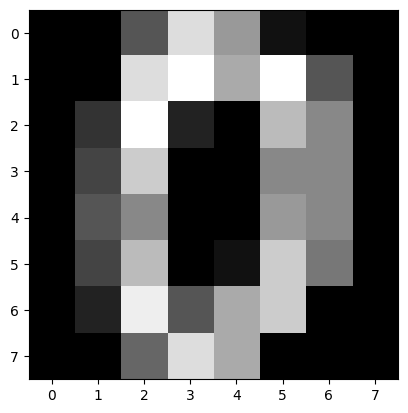

In [45]:
# визуализация первой цифры
plt.imshow(digits.images[0], cmap='gray')
plt.show()

Далее необходимо разделить данные на обучающую и тестовую выборки с помощью функции train_test_split из модуля sklearn.model_selection:

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

## Часть 1. Многоклассовая классификация с моделью перцептрон (Perceptron)  с помощью стратегии "one-vs-one"

Для решения задачи многоклассовой классификации с использованием модели перцептрона и стратегии "one-vs-one" в библиотеке scikit-learn (sklearn) можно использовать классификатор sklearn.linear_model.Perceptron. 

Cоздаем объект классификатора Perceptron и устанавливаем параметры модели. В данном случае мы используем параметр tol для задания критерия остановки (требуемой точности решения) и параметр random_state для установки начального состояния генератора случайных чисел, что позволит воспроизвести результаты.

In [47]:
from sklearn.linear_model import Perceptron

"""
Создайте экземпляр класса Perceptron, передайте в него следующие параметры: tol=1e-3, random_state=seed, 
сохраните экземпляр в переменную clf1.
Пример:
classifier = Perceptron(param1=value1, param2=value2)
"""
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
clf1 = Perceptron(tol=1e-3, random_state=seed)
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

In [48]:
assert type(clf1) == Perceptron and clf1.tol == 0.001

Далее создаем экземпляр класса стратегии "one-vs-one" для многоклассовой классификации:

In [49]:
from sklearn.multiclass import OneVsOneClassifier

"""
Создайте экземпляр класса OneVsOneClassifier, передайте в него классификатор clf1, 
сохраните экземпляр в переменную clf1.
Пример:
classifier = OneVsOneClassifier(classifier)
"""

# НАЧАЛО ВАШЕГО РЕШЕНИЯ
clf1 = OneVsOneClassifier(clf1)
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

In [50]:
assert type(clf1) == OneVsOneClassifier

Обучаем модель и делаем предсказания на тестовой выборке:

In [51]:
"""
Обучите модель на данных X_train, y_train с помощью метода fit.
Сделайте предсказание на данных X_test с помощью метода predict и сохраните предсказания в переменную y_pred1
"""

# НАЧАЛО ВАШЕГО РЕШЕНИЯ
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

Оценим точность классификации с помощью метрик из модуля sklearn.metrics:

In [52]:
perceptron_accuracy_score = accuracy_score(y_test, y_pred1)
perceptron_precision_score = precision_score(y_test, y_pred1, average='macro')
perceptron_recall_score = recall_score(y_test, y_pred1, average='macro')
perceptron_f1_score = f1_score(y_test, y_pred1, average='macro')

# Качество по всем метрикам должно быть выше 95%

print(f"perceptron_accuracy_score: {perceptron_accuracy_score}")
print(f"perceptron_precision_score: {perceptron_precision_score}")
print(f"perceptron_recall_score: {perceptron_recall_score}")
print(f"perceptron_f1_score: {perceptron_f1_score}")

perceptron_accuracy_score: 0.9666666666666667
perceptron_precision_score: 0.9667979978048044
perceptron_recall_score: 0.9666647210984209
perceptron_f1_score: 0.9658945948627322


In [53]:
assert perceptron_accuracy_score > 0.95


## Часть 2. Многоклассовая классификация с моделью логистической регрессии (LogisticRegression)  с функцией softmax

Логистическая регрессия с функцией softmax также является методом многоклассовой классификации в библиотеке Scikit-learn.

Рассмотрим пример использования класса LogisticRegression с функцией softmax для многоклассовой классификации:

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
"""
Создайте экземпляр класса логистической регрессии LogisticRegression, передайте в него параметры
multi_class='multinomial' и solver='lbfgs' ,
сохраните экземпляр в переменную clf2.
Пример:
clf2 = LogisticRegression(param1=value1, param2=value2)
"""

# НАЧАЛО ВАШЕГО РЕШЕНИЯ
clf2 = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

In [56]:
assert type(clf2) == LogisticRegression

Будем использовать те же данные MNIST:

In [57]:
"""
Обучите модель на данных X_train, y_train с помощью метода fit.
Сделайте предсказание на данных X_test с помощью метода predict и сохраните предсказания в переменную y_pred2
"""

# НАЧАЛО ВАШЕГО РЕШЕНИЯ
# при стандартном решении получаем ошибку: ConvergenceWarning: lbfgs failed to converge (status=1): STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
# в связи с этим было решено провести масштабирование данных
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
clf2.fit(scaler.fit_transform(X_train), y_train)
y_pred2 = clf2.predict(scaler.transform(X_test))
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

In [58]:
# расчет точности
logreg_accuracy_score = accuracy_score(y_test, y_pred2)
logreg_precision_score = precision_score(y_test, y_pred2, average='macro')
logreg_recall_score = recall_score(y_test, y_pred2, average='macro')
logreg_f1_score = f1_score(y_test, y_pred2, average='macro')

# Качество по всем метрикам должно быть выше 95%

print(f"logreg_accuracy_score: {logreg_accuracy_score}")
print(f"logreg_precision_score: {logreg_precision_score}")
print(f"logreg_recall_score: {logreg_recall_score}")
print(f"logreg_f1_score: {logreg_f1_score}")

logreg_accuracy_score: 0.9833333333333333
logreg_precision_score: 0.9821433089364779
logreg_recall_score: 0.9813840354408306
logreg_f1_score: 0.981675891105074


In [59]:
assert logreg_accuracy_score > 0.95


## Часть 3. Многоклассовая классификация с моделью SVM (SVC)  с помощью стратегии "one-vs-one"

Рассмотрим пример многоклассовой классификации с использованием модели SVM (SVC) и стратегии "one-vs-one" в библиотеке Scikit-learn:

In [60]:
from sklearn.svm import SVC

В SVM (Support Vector Machine) параметр kernel определяет ядро, используемое для вычисления расстояний между точками в пространстве признаков. "rbf" является одним из наиболее распространенных ядер и означает использование радиально-базисной функции (Radial Basis Function) в качестве ядра. Оно позволяет моделировать нелинейные зависимости между признаками и достаточно гибко подстраивается под различные формы данных.

Параметр decision_function_shape определяет форму функции решения задачи многоклассовой классификации. "ovo" (one-vs-one) означает, что для каждой пары классов строится бинарный классификатор, который разделяет объекты из этих двух классов. Затем, чтобы определить класс нового объекта, модель использует голосование по всем построенным бинарным классификаторам. Другой вариант — "ovr" (one-vs-rest), при котором для каждого класса строится бинарный классификатор, который отделяет этот класс от всех остальных. Определение класса нового объекта происходит путем выбора классификатора, который выдал наибольшее значение решающей функции для этого объекта.

In [61]:
"""
Создайте экземпляр класса SVC, передайте в него параметры
kernel="rbf" и decision_function_shape="ovo" ,
сохраните экземпляр в переменную clf3.
Пример:
clf3 = SVC(param1=value1, param2=value2)
"""

# НАЧАЛО ВАШЕГО РЕШЕНИЯ
clf3 =SVC(kernel='rbf', decision_function_shape='ovo')
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

In [62]:
assert type(clf3) == SVC

Будем использовать те же данные MNIST:

In [63]:
"""
Обучите модель на данных X_train, y_train с помощью метода fit.
Сделайте предсказание на данных X_test с помощью метода predict и сохраните предсказания в переменную y_pred3
"""

# НАЧАЛО ВАШЕГО РЕШЕНИЯ
clf3.fit(X_train, y_train)
y_pred3 = clf3.predict(X_test)
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

In [64]:
# расчет точности
svm_accuracy_score = accuracy_score(y_test, y_pred3)
svm_precision_score = precision_score(y_test, y_pred3, average='macro')
svm_recall_score = recall_score(y_test, y_pred3, average='macro')
svm_f1_score = f1_score(y_test, y_pred3, average='macro')

# Качество по всем метрикам должно быть выше 95%

print(f"svm_accuracy_score: {svm_accuracy_score}")
print(f"svm_precision_score: {svm_precision_score}")
print(f"svm_recall_score: {svm_recall_score}")
print(f"svm_f1_score: {svm_f1_score}")

svm_accuracy_score: 0.9916666666666667
svm_precision_score: 0.9910599078341015
svm_recall_score: 0.9909078449646401
svm_f1_score: 0.9908885806721376


In [65]:
assert svm_accuracy_score > 0.95
